In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [56]:
#Read the file
import pandas
data=pd.read_csv("reviews.csv",error_bad_lines=False)

<ipython-input-56-37fb0e9ecd5c>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv("reviews.csv",error_bad_lines=False)


In [57]:
data


movie_name                                            reviews
0                 Joker  Joker is a subversion of the trope of the hero...
1                 Joker  Without Mr. Phoenix, Joker would be kind of dull.
2                 Joker  Joker is repulsive, cynical garbage that tries...
3                 Joker  Joker is a one-man show...the riot scenes near...
4                 Joker  It's one of 2019's most unforgettable cinemati...
...                 ...                                                ...
1038  Lord of the Rings  It's hard to overstate the soaring achievement...
1039  Lord of the Rings  Adheres to the values of its predecessors - it...
1040  Lord of the Rings  More goose-pimply epic swirl and top-notch Uru...
1041  Lord of the Rings  At 210 minutes, some might wish Peter Jackson ...
1042  Lord of the Rings  You could open an entire can of hyperbole over...

[1043 rows x 2 columns]

In [58]:
data1 = data.rename(columns={"text": "new_text"})
data1


movie_name                                            reviews
0                 Joker  Joker is a subversion of the trope of the hero...
1                 Joker  Without Mr. Phoenix, Joker would be kind of dull.
2                 Joker  Joker is repulsive, cynical garbage that tries...
3                 Joker  Joker is a one-man show...the riot scenes near...
4                 Joker  It's one of 2019's most unforgettable cinemati...
...                 ...                                                ...
1038  Lord of the Rings  It's hard to overstate the soaring achievement...
1039  Lord of the Rings  Adheres to the values of its predecessors - it...
1040  Lord of the Rings  More goose-pimply epic swirl and top-notch Uru...
1041  Lord of the Rings  At 210 minutes, some might wish Peter Jackson ...
1042  Lord of the Rings  You could open an entire can of hyperbole over...

[1043 rows x 2 columns]

In [59]:
data1=pd.DataFrame(data1)

In [60]:
data1


movie_name                                            reviews
0                 Joker  Joker is a subversion of the trope of the hero...
1                 Joker  Without Mr. Phoenix, Joker would be kind of dull.
2                 Joker  Joker is repulsive, cynical garbage that tries...
3                 Joker  Joker is a one-man show...the riot scenes near...
4                 Joker  It's one of 2019's most unforgettable cinemati...
...                 ...                                                ...
1038  Lord of the Rings  It's hard to overstate the soaring achievement...
1039  Lord of the Rings  Adheres to the values of its predecessors - it...
1040  Lord of the Rings  More goose-pimply epic swirl and top-notch Uru...
1041  Lord of the Rings  At 210 minutes, some might wish Peter Jackson ...
1042  Lord of the Rings  You could open an entire can of hyperbole over...

[1043 rows x 2 columns]

In [61]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [62]:
data1 = str(data1)
data1 = data1.strip()
data1 = data1.split('\n')
data1 = [text for text in data1 if text]


In [63]:
data1


['movie_name                                            reviews',
 '0                 Joker  Joker is a subversion of the trope of the hero...',
 '1                 Joker  Without Mr. Phoenix, Joker would be kind of dull.',
 '2                 Joker  Joker is repulsive, cynical garbage that tries...',
 '3                 Joker  Joker is a one-man show...the riot scenes near...',
 "4                 Joker  It's one of 2019's most unforgettable cinemati...",
 '...                 ...                                                ...',
 "1038  Lord of the Rings  It's hard to overstate the soaring achievement...",
 '1039  Lord of the Rings  Adheres to the values of its predecessors - it...',
 '1040  Lord of the Rings  More goose-pimply epic swirl and top-notch Uru...',
 '1041  Lord of the Rings  At 210 minutes, some might wish Peter Jackson ...',
 '1042  Lord of the Rings  You could open an entire can of hyperbole over...',
 '[1043 rows x 2 columns]']

In [64]:
#tokenizing
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data1))
sentences[0:15]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['movie_name                                            reviews 0                 Joker  Joker is a subversion of the trope of the hero... 1                 Joker  Without Mr. Phoenix, Joker would be kind of dull.',
 "2                 Joker  Joker is repulsive, cynical garbage that tries... 3                 Joker  Joker is a one-man show...the riot scenes near... 4                 Joker  It's one of 2019's most unforgettable cinemati... ...                 ...                                                ... 1038  Lord of the Rings  It's hard to overstate the soaring achievement... 1039  Lord of the Rings  Adheres to the values of its predecessors - it... 1040  Lord of the Rings  More goose-pimply epic swirl and top-notch Uru... 1041  Lord of the Rings  At 210 minutes, some might wish Peter Jackson ... 1042  Lord of the Rings  You could open an entire can of hyperbole over... [1043 rows x 2 columns]"]

In [65]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df


sentence
0  movie_name                                    ...
1  2                 Joker  Joker is repulsive, c...

In [66]:
#frequency of words
freq1 = pd.Series(' '.join(sent_df['sentence']).split()).value_counts()[:50] # for top 20
freq1

of                11
the                9
Joker              9
Lord               5
Rings              5
...                4
is                 3
to                 2
It's               2
2                  2
a                  2
and                1
epic               1
top-notch          1
Uru...             1
swirl              1
movie_name         1
it...              1
goose-pimply       1
More               1
1040               1
At                 1
-                  1
predecessors       1
its                1
1041               1
might              1
210                1
minutes,           1
x                  1
rows               1
[1043              1
over...            1
hyperbole          1
can                1
entire             1
an                 1
open               1
could              1
You                1
1042               1
Jackson            1
Peter              1
wish               1
Adheres            1
some               1
values             1
hard         

In [67]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [69]:
#removing stopwords
sent_df['sentence1'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [70]:
#removing punctuations
sent_df['clean'] = sent_df['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [71]:
sent_df


sentence  \
0  movie_name                                    ...   
1  2                 Joker  Joker is repulsive, c...   

                                           sentence1  \
0  movie_name reviews 0 Joker Joker subversion tr...   
1  2 Joker Joker repulsive, cynical garbage tries...   

                                               clean  
0  movie_name reviews 0 Joker Joker subversion tr...  
1  2 Joker Joker repulsive, cynical garbage tries...

In [72]:
sent_df=sent_df.drop('sentence',axis=1)

In [73]:
sent_df


sentence1  \
0  movie_name reviews 0 Joker Joker subversion tr...   
1  2 Joker Joker repulsive, cynical garbage tries...   

                                               clean  
0  movie_name reviews 0 Joker Joker subversion tr...  
1  2 Joker Joker repulsive, cynical garbage tries...

In [74]:
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [75]:
#coverting to dic format and for 20 words
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [76]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        clean = nlp(text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [77]:
#calulating the sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)

In [78]:
sent_df['sentiment_value']

0    2
1   -2
Name: sentiment_value, dtype: int64

In [79]:
#calulating the number of words in each sentence
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1    74
Name: word_count, dtype: int64

In [80]:
#sort based on sentiment value
sent_df.sort_values(by='sentiment_value').head(10)

sentence1  \
1  2 Joker Joker repulsive, cynical garbage tries...   
0  movie_name reviews 0 Joker Joker subversion tr...   

                                               clean  sentiment_value  \
1  2 Joker Joker repulsive, cynical garbage tries...               -2   
0  movie_name reviews 0 Joker Joker subversion tr...                2   

   word_count  
1          74  
0          17

In [81]:
sent_df['sentiment_value'].describe() #Here the max sentiment value is 13 and min value is -4


count    2.000000
mean     0.000000
std      2.828427
min     -2.000000
25%     -1.000000
50%      0.000000
75%      1.000000
max      2.000000
Name: sentiment_value, dtype: float64

In [82]:
#sentiment value less than or equal to 0
sent_df[sent_df['sentiment_value']<=0]

sentence1  \
1  2 Joker Joker repulsive, cynical garbage tries...   

                                               clean  sentiment_value  \
1  2 Joker Joker repulsive, cynical garbage tries...               -2   

   word_count  
1          74

In [83]:
#sentiment value greater than 0
sent_df[sent_df['sentiment_value']>0]

sentence1  \
0  movie_name reviews 0 Joker Joker subversion tr...   

                                               clean  sentiment_value  \
0  movie_name reviews 0 Joker Joker subversion tr...                2   

   word_count  
0          17

In [84]:
sent_df['index']=range(0,len(sent_df))


In [85]:
sent_df


sentence1  \
0  movie_name reviews 0 Joker Joker subversion tr...   
1  2 Joker Joker repulsive, cynical garbage tries...   

                                               clean  sentiment_value  \
0  movie_name reviews 0 Joker Joker subversion tr...                2   
1  2 Joker Joker repulsive, cynical garbage tries...               -2   

   word_count  index  
0          17      0  
1          74      1

<ipython-input-86-911d1c3938c2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

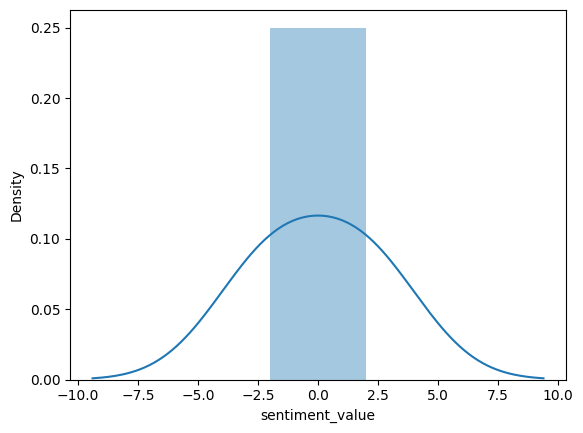

In [86]:
#densityplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

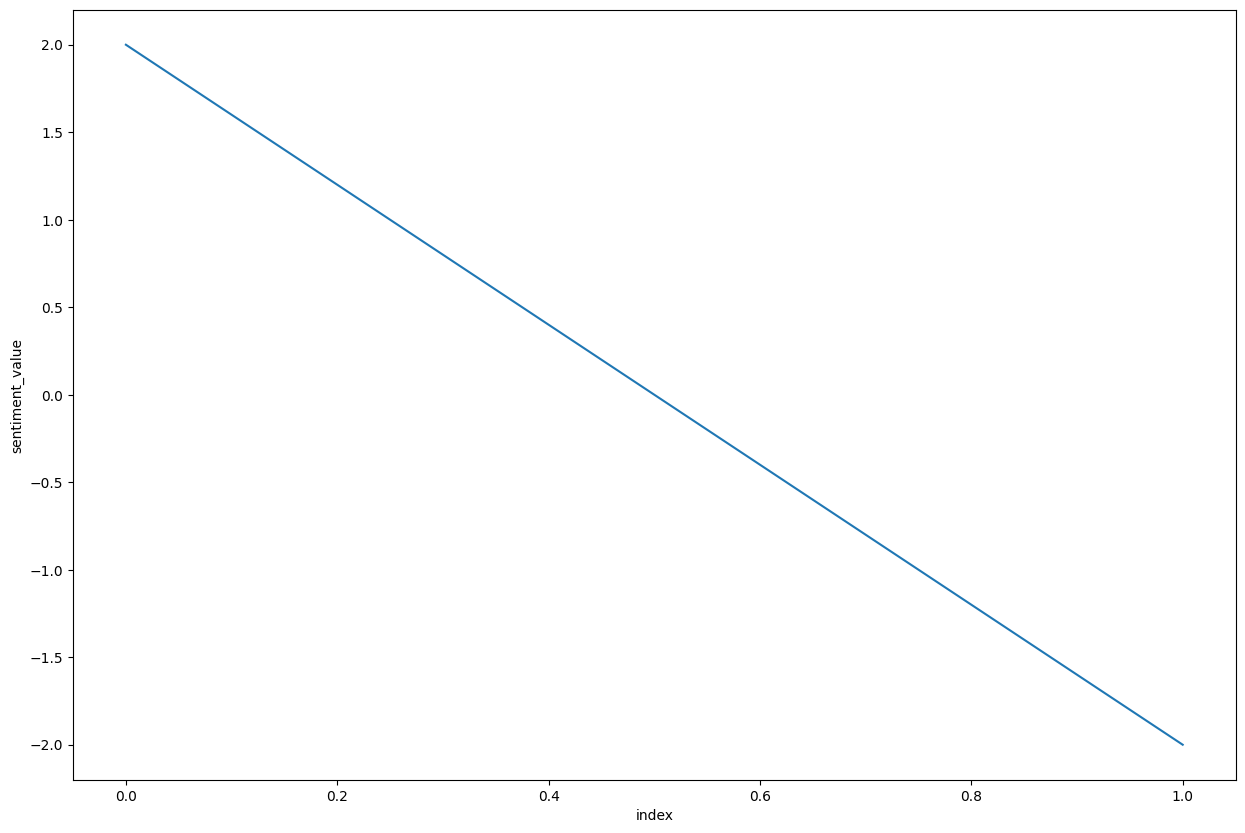

In [89]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)


<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

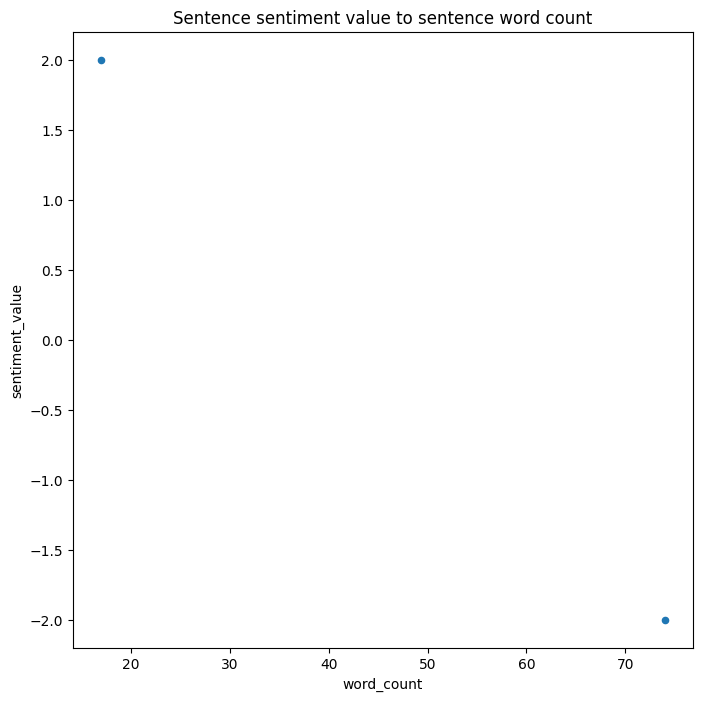

In [88]:
#scatterplot between wordcount and sentiment value
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')